In [3]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("Pokemon (1).csv")

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select relevant features and target
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].values
y = df['Type 1'].values

# Normalize features using Z-Score Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-Hot Encode target labels (only Type 1)
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# Add bias term (intercept)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize weights (for multi-class)
n_classes = y_encoded.shape[1]
weights = np.zeros((X_train.shape[1], n_classes))

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-Entropy Loss (Cost Function)
def compute_cost(X, y, weights):
    m = X.shape[0]
    h = softmax(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(h + 1e-9))  # Adding small value to avoid log(0)
    return cost

# Gradient Descent
def gradient_descent(X, y, weights, learning_rate, num_iterations):
    m = X.shape[0]
    for i in range(num_iterations):
        h = softmax(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (h - y))
        weights -= learning_rate * gradient
        
        if i % 1000 == 0:
            cost = compute_cost(X, y, weights)
            print(f"Iteration {i}: Cost = {cost:.4f}")
    
    return weights

# Predict Function
def predict(X, weights):
    h = softmax(np.dot(X, weights))
    return np.argmax(h, axis=1)

# Train the Model
learning_rate = 6
num_iterations = 10000
weights = gradient_descent(X_train, y_train, weights, learning_rate, num_iterations)

Iteration 0: Cost = 2.5886
Iteration 1000: Cost = 2.2894
Iteration 2000: Cost = 2.2894
Iteration 3000: Cost = 2.2894
Iteration 4000: Cost = 2.2894
Iteration 5000: Cost = 2.2894
Iteration 6000: Cost = 2.2894
Iteration 7000: Cost = 2.2894
Iteration 8000: Cost = 2.2894
Iteration 9000: Cost = 2.2894


In [6]:
# Shuffle the test data
shuffled_indices = np.random.permutation(X_test.shape[0])
X_test_shuffled = X_test[shuffled_indices]
y_test_shuffled = y_test[shuffled_indices]

# Make predictions
predictions = predict(X_test_shuffled, weights)
y_test_labels = np.argmax(y_test_shuffled, axis=1)

# Convert back to original labels
predicted_labels = encoder.inverse_transform(np.eye(n_classes)[predictions])
actual_labels = encoder.inverse_transform(np.eye(n_classes)[y_test_labels])

# Calculate Accuracy|
accuracy = np.mean(predicted_labels == actual_labels)
print(f'\nAccuracy: {accuracy * 100:.2f}%')


Accuracy: 18.75%


In [7]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=5000, solver='lbfgs')
model.fit(X_train, np.argmax(y_train, axis=1))  # Convert one-hot to class labels

# Make predictions
predictions = model.predict(X_test)

# Convert predictions and true labels back to original labels
predicted_labels = encoder.inverse_transform(np.eye(y_encoded.shape[1])[predictions])
actual_labels = encoder.inverse_transform(y_test)

# Calculate Accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)
print(f'\nAccuracy: {accuracy * 100:.2f}%')


Accuracy: 18.75%



Classification Report:
              precision    recall  f1-score   support

         Bug       0.14      0.21      0.17        14
        Dark       0.00      0.00      0.00         6
      Dragon       0.11      0.17      0.13         6
    Electric       0.20      0.22      0.21         9
       Fairy       0.00      0.00      0.00         3
    Fighting       0.00      0.00      0.00         5
        Fire       0.00      0.00      0.00        10
      Flying       0.00      0.00      0.00         1
       Ghost       0.00      0.00      0.00         6
       Grass       0.00      0.00      0.00        14
      Ground       0.50      0.17      0.25         6
         Ice       0.00      0.00      0.00         5
      Normal       0.42      0.55      0.48        20
      Poison       0.00      0.00      0.00         6
     Psychic       0.14      0.08      0.11        12
        Rock       0.22      0.22      0.22         9
       Steel       0.14      0.17      0.15         6
   

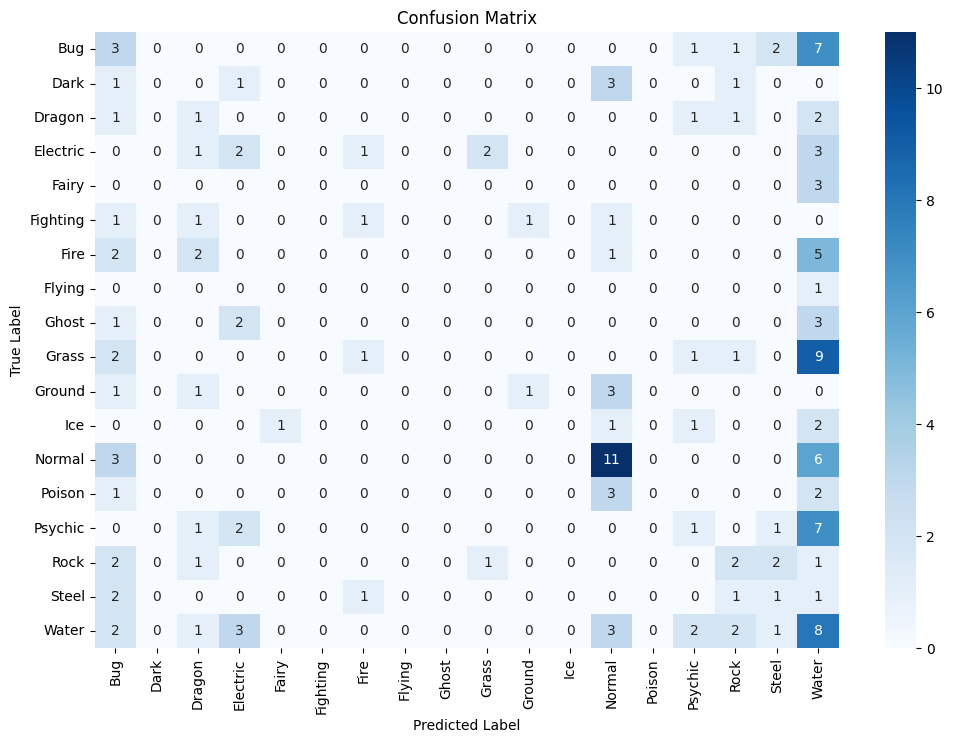

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
# Display Classification Report
print("\nClassification Report:")
print(classification_report(actual_labels, predicted_labels))

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(actual_labels, predicted_labels), annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 18.75%

Classification Report:
              precision    recall  f1-score   support

         Bug       0.00      0.00      0.00        14
        Dark       0.00      0.00      0.00         6
      Dragon       0.20      0.17      0.18         6
    Electric       0.00      0.00      0.00         9
       Fairy       0.00      0.00      0.00         3
    Fighting       0.00      0.00      0.00         5
        Fire       0.00      0.00      0.00        10
      Flying       0.00      0.00      0.00         1
       Ghost       0.00      0.00      0.00         6
       Grass       0.00      0.00      0.00        14
      Ground       0.00      0.00      0.00         6
         Ice       0.00      0.00      0.00         5
      Normal       0.31      0.65      0.42        20
      Poison       0.00      0.00      0.00         6
     Psychic       0.27      0.25      0.26        12
        Rock       0.00      0.00      0.00         9
       Steel       0.00      0.00      0

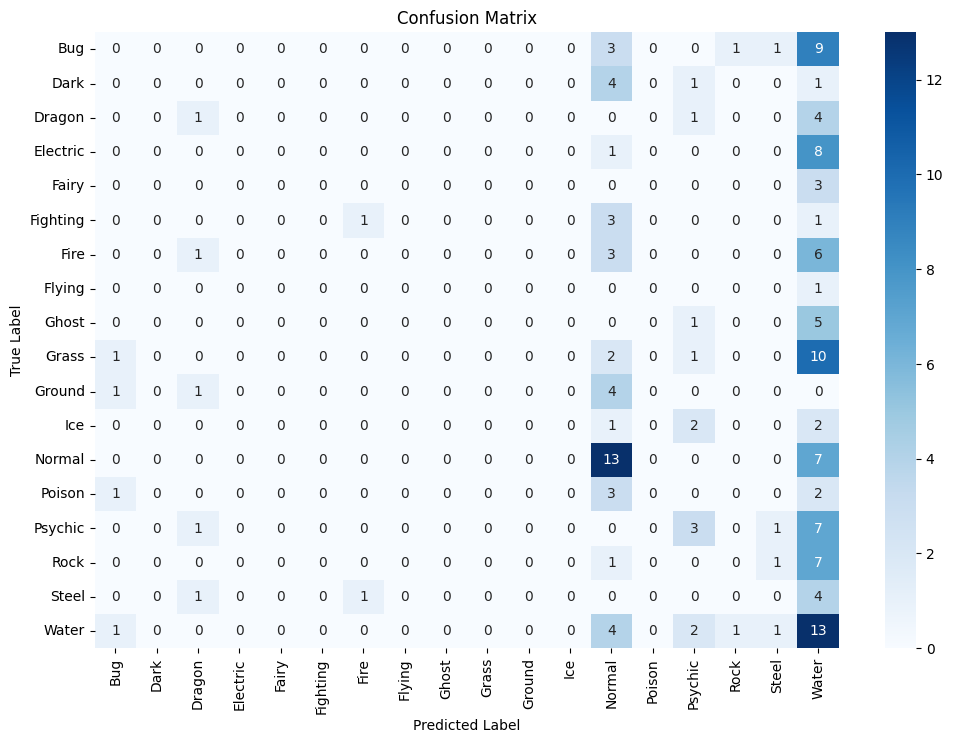

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Define features and target
X = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Type 1']

# Encode target labels using LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split into train and test sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale using StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# I will be using Random Forest Classifier

Accuracy: 27.50%

Classification Report:
              precision    recall  f1-score   support

         Bug       0.37      0.50      0.42        14
        Dark       0.50      0.17      0.25         6
      Dragon       0.30      0.50      0.38         6
    Electric       0.12      0.11      0.12         9
       Fairy       0.00      0.00      0.00         3
    Fighting       0.33      0.20      0.25         5
        Fire       0.25      0.20      0.22        10
      Flying       0.00      0.00      0.00         1
       Ghost       0.50      0.33      0.40         6
       Grass       0.12      0.07      0.09        14
      Ground       0.25      0.17      0.20         6
         Ice       0.00      0.00      0.00         5
      Normal       0.37      0.55      0.44        20
      Poison       0.00      0.00      0.00         6
     Psychic       0.31      0.33      0.32        12
        Rock       0.29      0.22      0.25         9
       Steel       0.00      0.00      0

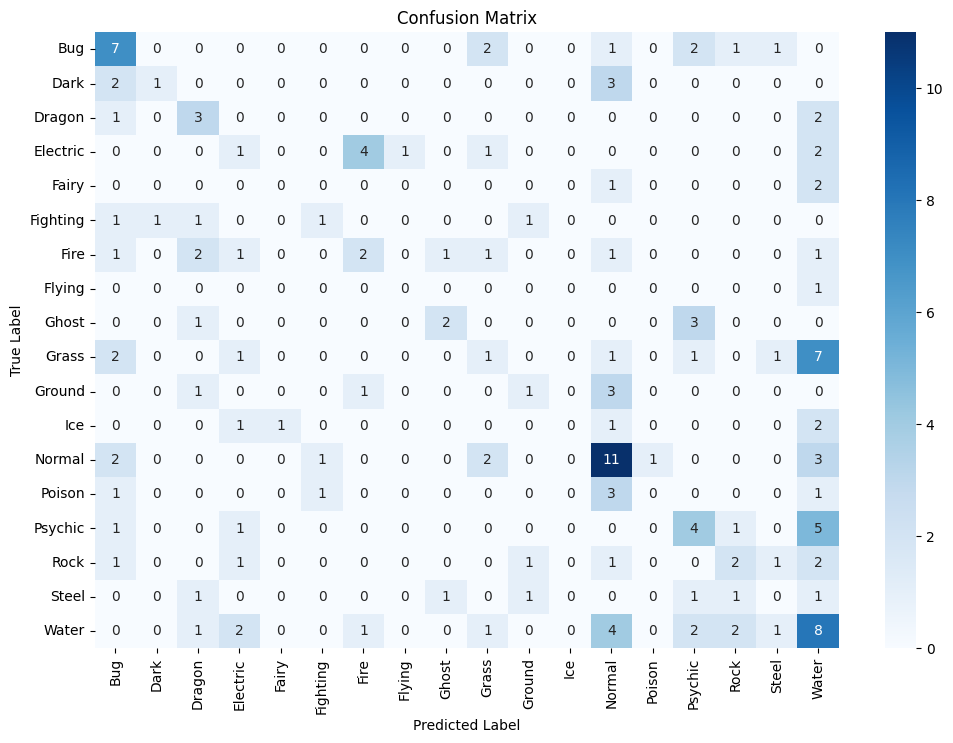

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Define features and target
X = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Type 1']

# Split into train and test sets (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier with the best parameters
model = RandomForestClassifier(
    n_estimators=53,  # Number of trees
    max_depth=20,      # Limit the depth to prevent overfitting
    min_samples_split=5,  # Require at least 5 samples to split a node
    min_samples_leaf=2,   # Require at least 2 samples to be a leaf
    max_features='sqrt',  # Consider sqrt of total features for each split (commonly used)
    bootstrap=True,      # Use bootstrapping
    random_state=50      # Ensures reproducibility
)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



Accuracy: 27.50%

Classification Report:
              precision    recall  f1-score   support

         Bug       0.35      0.50      0.41        14
        Dark       0.50      0.17      0.25         6
      Dragon       0.30      0.50      0.38         6
    Electric       0.14      0.11      0.12         9
       Fairy       0.00      0.00      0.00         3
    Fighting       0.33      0.20      0.25         5
        Fire       0.25      0.20      0.22        10
      Flying       0.00      0.00      0.00         1
       Ghost       0.50      0.33      0.40         6
       Grass       0.14      0.07      0.10        14
      Ground       0.25      0.17      0.20         6
         Ice       0.00      0.00      0.00         5
      Normal       0.38      0.55      0.45        20
      Poison       0.00      0.00      0.00         6
     Psychic       0.31      0.33      0.32        12
        Rock       0.29      0.22      0.25         9
       Steel       0.00      0.00      0

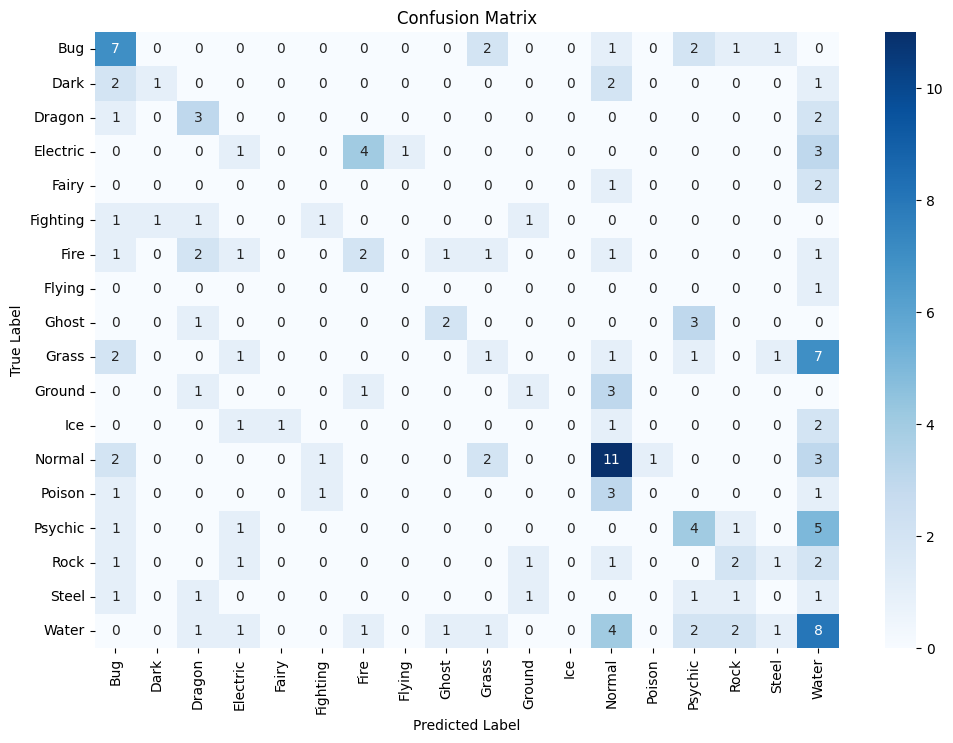

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Define features and target
X = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Type 1']

# Encode target labels using LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# For X, fill missing values with the mean of each column
X.fillna(X.mean(), inplace=True)

# For y, drop missing values
y.dropna(inplace=True)

# Ensure that X and y are aligned after dropping missing target values (in case rows are dropped in y)
X = X.loc[y.index]

# Split into train and test sets (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale the data using MinMaxScaler (scales the features to the range [0, 1])
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier with the best parameters
model = RandomForestClassifier(
    n_estimators=160,  # Number of trees
    max_depth=20,      # Limit the depth to prevent overfitting
    min_samples_split=5,  # Require at least 5 samples to split a node
    min_samples_leaf=2,   # Require at least 2 samples to be a leaf
    max_features='sqrt',  # Consider sqrt of total features for each split (commonly used)
    bootstrap=True,      # Use bootstrapping
    random_state=50      # Ensures reproducibility
)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Now i will be using XGBoost!!

Accuracy: 0.2812


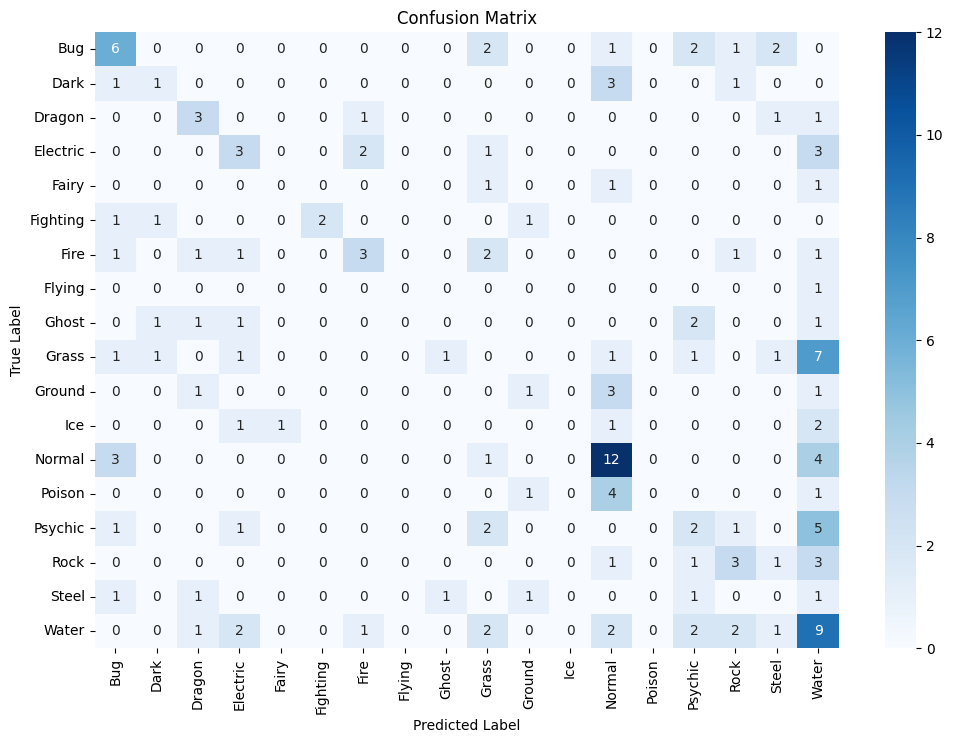

In [6]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Select features and target
X = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Type 1']

# Encode target labels consistently
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Scale the features consistently
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets with stratification and fixed random state
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Create and train the XGBoost model with consistent parameters
model = xgb.XGBClassifier(
    n_estimators=80,         # Number of trees (based on tuning)
    max_depth=5,             # Tree depth
    learning_rate=0.01,      # Step size
    subsample=0.8,           # Fraction of data used for each tree
    colsample_bytree=0.8,    # Fraction of features used per tree
    reg_alpha=0.01,          # L1 regularization
    reg_lambda=0.1,          # L2 regularization
    use_label_encoder=False, # Suppress warning for label encoding
    eval_metric='mlogloss',  # Multi-class classification loss
    random_state=42          # Fix randomness for consistent results
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


[0]	validation_0-mlogloss:2.87374	validation_1-mlogloss:2.88239
[1]	validation_0-mlogloss:2.85828	validation_1-mlogloss:2.87552
[2]	validation_0-mlogloss:2.84247	validation_1-mlogloss:2.86953
[3]	validation_0-mlogloss:2.82618	validation_1-mlogloss:2.86235
[4]	validation_0-mlogloss:2.81113	validation_1-mlogloss:2.85612
[5]	validation_0-mlogloss:2.79709	validation_1-mlogloss:2.85149
[6]	validation_0-mlogloss:2.78053	validation_1-mlogloss:2.84442
[7]	validation_0-mlogloss:2.76554	validation_1-mlogloss:2.83848
[8]	validation_0-mlogloss:2.75179	validation_1-mlogloss:2.83327
[9]	validation_0-mlogloss:2.73702	validation_1-mlogloss:2.82750
[10]	validation_0-mlogloss:2.72289	validation_1-mlogloss:2.82030
[11]	validation_0-mlogloss:2.70796	validation_1-mlogloss:2.81474
[12]	validation_0-mlogloss:2.69464	validation_1-mlogloss:2.80907
[13]	validation_0-mlogloss:2.68094	validation_1-mlogloss:2.80394
[14]	validation_0-mlogloss:2.66786	validation_1-mlogloss:2.79837
[15]	validation_0-mlogloss:2.65367	

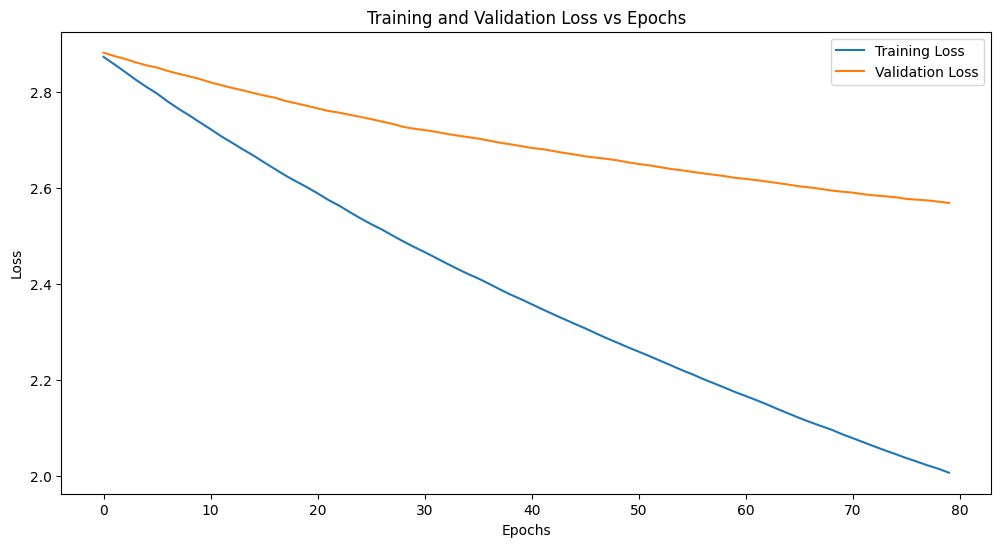

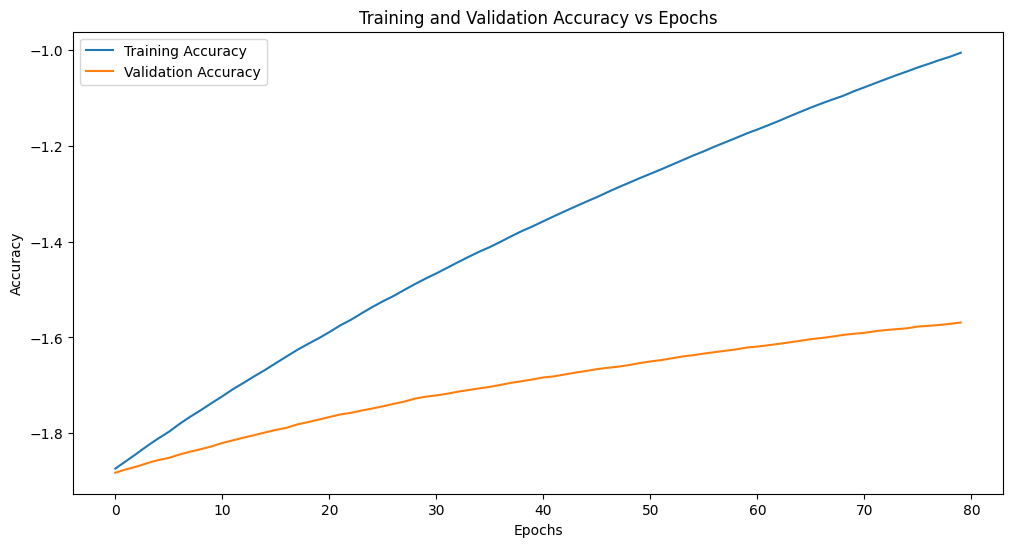

In [7]:
eval_set = [(X_train, y_train), (X_test, y_test)]

model = xgb.XGBClassifier(
    n_estimators=80,
    max_depth=5,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.01,
    reg_lambda=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Fit the model and record learning progress
history = model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

# Plot training and validation accuracy and loss
results = model.evals_result()

# Plot training and validation loss vs epochs
plt.figure(figsize=(12, 6))
plt.plot(results['validation_0']['mlogloss'], label='Training Loss')
plt.plot(results['validation_1']['mlogloss'], label='Validation Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate accuracy for training and validation at each epoch
train_accuracy = 1 - np.array(results['validation_0']['mlogloss'])
val_accuracy = 1 - np.array(results['validation_1']['mlogloss'])

plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'reg_alpha': [0.01, 0.05, 0.1],
    'reg_lambda': [0.1, 0.2, 0.5]
}

# Initialize the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:")
print(best_params)

# Predict and evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", matrix)



In [ ]:
#At Last i'm gonna use KNN Classifiers

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define features and target
X = df[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
y = df['Type 1']

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.dropna(inplace=True)

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Scale features using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Create KNN model (try different k values for better accuracy)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Shuffle test data before prediction
shuffled_indices = np.random.permutation(X_test.shape[0])
X_test_shuffled = X_test[shuffled_indices]
y_test_shuffled = y_test[shuffled_indices]

# Predict and evaluate
y_pred = knn.predict(X_test_shuffled)
accuracy = accuracy_score(y_test_shuffled, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_shuffled, y_pred))

# Confusion matrix
matrix = confusion_matrix(y_test_shuffled, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, cmap="Blues", fmt="d", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Store error rates for different K values
error_rate = []

# Try K values from 1 to 40
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = np.mean(y_pred != y_test)
    error_rate.append(error)

# Find the optimal K value (with minimum error rate)
optimal_k = np.argmin(error_rate) + 1
min_error = error_rate[optimal_k - 1]

print(f"Optimal K value: {optimal_k}")
print(f"Least Error Rate: {min_error:.4f}")

# Plot the error rate vs K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.axvline(x=optimal_k, color='green', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.legend()
plt.show()

